In [37]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("Dataset\Dataset\[use case 1] Inventory Optimization for Retail\inventory_monitoring.csv")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Product ID                     10000 non-null  int64 
 1   Store ID                       10000 non-null  int64 
 2   Stock Levels                   10000 non-null  int64 
 3   Supplier Lead Time (days)      10000 non-null  int64 
 4   Stockout Frequency             10000 non-null  int64 
 5   Reorder Point                  10000 non-null  int64 
 6   Expiry Date                    10000 non-null  object
 7   Warehouse Capacity             10000 non-null  int64 
 8   Order Fulfillment Time (days)  10000 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 703.3+ KB


In [22]:
# Display initial info
print("Original Data:")
display(df.head())

Original Data:


,Product ID,Store ID,Stock Levels,Supplier Lead Time (days),Stockout Frequency,Reorder Point,Expiry Date,Warehouse Capacity,Order Fulfillment Time (days)
0,9286,16,700,10,14,132,2024-01-15,1052,6
1,2605,60,82,11,1,127,2024-12-16,1262,9
2,2859,55,145,25,14,192,2024-04-30,1457,12
3,2374,24,151,17,6,19,2024-12-16,2944,3
4,7678,5,714,12,2,21,2024-08-05,3739,7


# Data Cleaning

In [23]:
# Check for any remaining missing values
print("\nMissing Values After Filling:")
print(df.isnull().sum())


Missing Values After Filling:
Product ID                       0
Store ID                         0
Stock Levels                     0
Supplier Lead Time (days)        0
Stockout Frequency               0
Reorder Point                    0
Expiry Date                      0
Warehouse Capacity               0
Order Fulfillment Time (days)    0
dtype: int64


In [24]:
# Convert 'Expiry Date' to datetime format
df['Expiry Date'] = pd.to_datetime(df['Expiry Date'], errors='coerce')

In [25]:
# Extract year from 'Expiry Date'
df['Expiry Year'] = df['Expiry Date'].dt.year

# Preview the result
display(df[['Expiry Date', 'Expiry Year']].head())

# Get unique expiry years
unique_years = df['Expiry Year'].unique()
print("Unique Expiry Years:", unique_years)

,Expiry Date,Expiry Year
0,2024-01-15,2024
1,2024-12-16,2024
2,2024-04-30,2024
3,2024-12-16,2024
4,2024-08-05,2024


Unique Expiry Years: [2024]


In [26]:
# Drop rows with invalid or missing Expiry Dates if they are important
df = df.dropna(subset=['Expiry Date'])

In [27]:
# Today's date for comparison (2025)
today = pd.to_datetime(datetime.today().date())

# Check if expired
df['Expired'] = df['Expiry Date'] < today

# Optional: Count expired products
expired_count = df['Expired'].sum()
print(f"\n⚠️ Total expired products: {expired_count}")


⚠️ Total expired products: 10000


In [28]:
# Calculate Available Capacity if needed (assuming product takes 1 unit of space)
df['Available Capacity After Restock'] = df['Warehouse Capacity'] - df['Stock Levels']

In [29]:
# Add expected total lead time
df['Total Lead Time'] = df['Supplier Lead Time (days)'] + df['Order Fulfillment Time (days)']

In [30]:
# Reorder the columns for readability
cols = ['Product ID', 'Store ID', 'Stock Levels', 'Reorder Point', 'Expired',
        'Expiry Date', 'Warehouse Capacity', 'Available Capacity After Restock', 
        'Supplier Lead Time (days)', 'Order Fulfillment Time (days)', 'Total Lead Time', 'Stockout Frequency']

df = df[cols]

# Final preview
print("\nCleaned & Preprocessed Data:")
display(df)


Cleaned & Preprocessed Data:


,Product ID,Store ID,Stock Levels,Reorder Point,Expired,Expiry Date,Warehouse Capacity,Available Capacity After Restock,Supplier Lead Time (days),Order Fulfillment Time (days),Total Lead Time,Stockout Frequency
0,9286,16,700,132,True,2024-01-15,1052,352,10,6,16,14
1,2605,60,82,127,True,2024-12-16,1262,1180,11,9,20,1
2,2859,55,145,192,True,2024-04-30,1457,1312,25,12,37,14
3,2374,24,151,19,True,2024-12-16,2944,2793,17,3,20,6
4,7678,5,714,21,True,2024-08-05,3739,3025,12,7,19,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9337,27,860,96,True,2024-04-30,4025,3165,27,12,39,19
9996,5907,90,282,173,True,2024-03-18,4983,4701,25,2,27,19
9997,6159,7,352,123,True,2024-04-23,3517,3165,4,13,17,6
9998,1564,14,325,153,True,2024-06-24,4868,4543,10,1,11,14


In [31]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display how many and a preview
print(f"🔍 Total duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows.head())

🔍 Total duplicate rows: 0
Empty DataFrame
Columns: [Product ID, Store ID, Stock Levels, Reorder Point, Expired, Expiry Date, Warehouse Capacity, Available Capacity After Restock, Supplier Lead Time (days), Order Fulfillment Time (days), Total Lead Time, Stockout Frequency]
Index: []


# Feature Engineering

In [33]:
# Use today's actual date
today = datetime.today()

# --- Feature 1: Days Until Expiry (will be negative since all are expired) ---
df['Expiry Date'] = pd.to_datetime(df['Expiry Date'], errors='coerce')
df['Days_Until_Expiry'] = (df['Expiry Date'] - today).dt.days

# --- Feature 2: Is Near Expiry (set to False as all are expired) ---
df['Is_Near_Expiry'] = df['Days_Until_Expiry'] <= 30  # All will be True but negative days

# --- Feature 3: Restock Required ---
df['Restock_Required'] = df['Stock Levels'] < df['Reorder Point']

# --- Feature 4: Is Overstocked ---
df['Is_Overstocked'] = df['Stock Levels'] > (0.9 * df['Warehouse Capacity'])

# --- Feature 5: Utilization Rate (0 to 1, or more if overstocked) ---
df['Utilization_Rate'] = (df['Stock Levels'] / df['Warehouse Capacity']).round(2)

# --- Feature 6: Adjusted Lead Time (total time to restock) ---
df['Adjusted_Lead_Time'] = df['Supplier Lead Time (days)'] + df['Order Fulfillment Time (days)']

# --- Feature 7: Reorder Urgency Score ---
# Higher when: low stock, near expiry (expired in this case), long lead time
df['Reorder_Urgency_Score'] = (
    (df['Reorder Point'] - df['Stock Levels']).clip(lower=0) +
    df['Is_Near_Expiry'].astype(int) * 5 +
    df['Adjusted_Lead_Time'] * 0.5
).round(2)

In [35]:
df.columns

Index(['Product ID', 'Store ID', 'Stock Levels', 'Reorder Point', 'Expired',
       'Expiry Date', 'Warehouse Capacity', 'Available Capacity After Restock',
       'Supplier Lead Time (days)', 'Order Fulfillment Time (days)',
       'Total Lead Time', 'Stockout Frequency', 'Restock_Required',
       'Is_Overstocked', 'Utilization_Rate', 'Adjusted_Lead_Time',
       'Days_Until_Expiry', 'Is_Near_Expiry', 'Reorder_Urgency_Score'],
      dtype='object')

In [36]:
# Define desired column order
new_column_order = [
    'Product ID', 'Store ID',  # Identifiers

    # Stock & Capacity
    'Stock Levels', 'Warehouse Capacity', 'Available Capacity After Restock',
    'Utilization_Rate', 'Is_Overstocked',

    # Restocking
    'Reorder Point', 'Restock_Required', 'Stockout Frequency',

    # Lead Times
    'Supplier Lead Time (days)', 'Order Fulfillment Time (days)',
    'Total Lead Time', 'Adjusted_Lead_Time',

    # Expiry
    'Expiry Date', 'Days_Until_Expiry', 'Is_Near_Expiry', 'Expired',

    # Final Score
    'Reorder_Urgency_Score'
]

# Reorder the DataFrame
df = df[new_column_order]

# Preview
display(df.head())


,Product ID,Store ID,Stock Levels,Warehouse Capacity,Available Capacity After Restock,Utilization_Rate,Is_Overstocked,Reorder Point,Restock_Required,Stockout Frequency,Supplier Lead Time (days),Order Fulfillment Time (days),Total Lead Time,Adjusted_Lead_Time,Expiry Date,Days_Until_Expiry,Is_Near_Expiry,Expired,Reorder_Urgency_Score
0,9286,16,700,1052,352,0.67,False,132,False,14,10,6,16,16,2024-01-15,-446,True,True,13.0
1,2605,60,82,1262,1180,0.06,False,127,True,1,11,9,20,20,2024-12-16,-110,True,True,60.0
2,2859,55,145,1457,1312,0.10,False,192,True,14,25,12,37,37,2024-04-30,-340,True,True,70.5
3,2374,24,151,2944,2793,0.05,False,19,False,6,17,3,20,20,2024-12-16,-110,True,True,15.0
4,7678,5,714,3739,3025,0.19,False,21,False,2,12,7,19,19,2024-08-05,-243,True,True,14.5


# Visualization

In [38]:
# Optional for notebook environments
%matplotlib inline

# Set style
sns.set(style="whitegrid", palette="muted")

## 📊 1. Distribution of Stock Levels

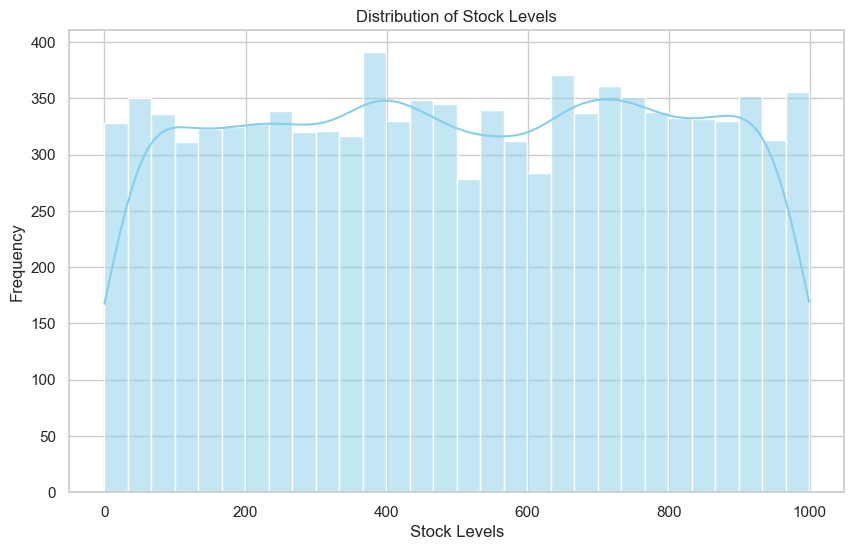

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Stock Levels'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Stock Levels")
plt.xlabel("Stock Levels")
plt.ylabel("Frequency")
plt.show()

## 🔥 2. Top 10 Products with Highest Reorder Urgency

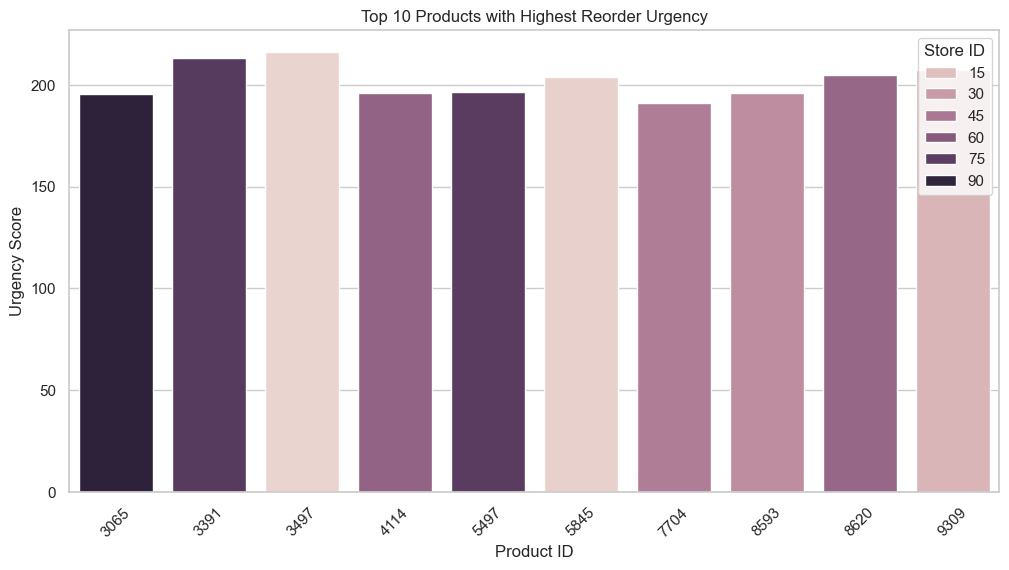

In [40]:
top_urgent = df.sort_values('Reorder_Urgency_Score', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_urgent, x='Product ID', y='Reorder_Urgency_Score', hue='Store ID')
plt.title("Top 10 Products with Highest Reorder Urgency")
plt.ylabel("Urgency Score")
plt.xlabel("Product ID")
plt.xticks(rotation=45)
plt.show()

## 🧯 3. Restock Requirement by Store

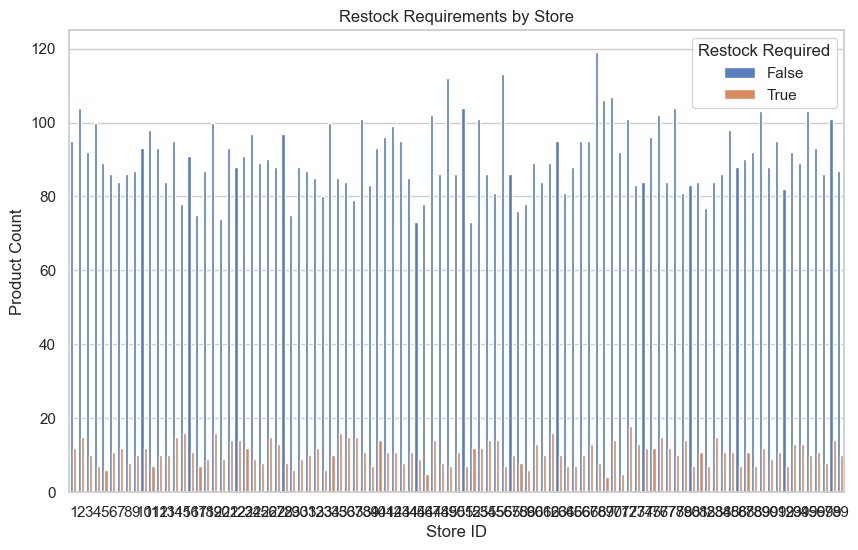

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Store ID', hue='Restock_Required')
plt.title("Restock Requirements by Store")
plt.ylabel("Product Count")
plt.xlabel("Store ID")
plt.legend(title="Restock Required")
plt.show()

## 🧃 4. Utilization Rate vs Overstocked Products

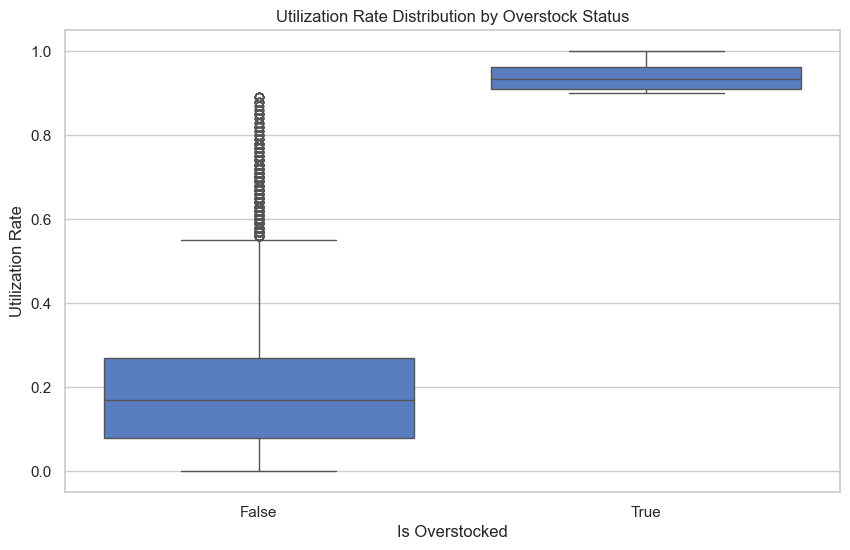

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Is_Overstocked', y='Utilization_Rate')
plt.title("Utilization Rate Distribution by Overstock Status")
plt.xlabel("Is Overstocked")
plt.ylabel("Utilization Rate")
plt.show()

## 🧨 5. Heatmap of Feature Correlations

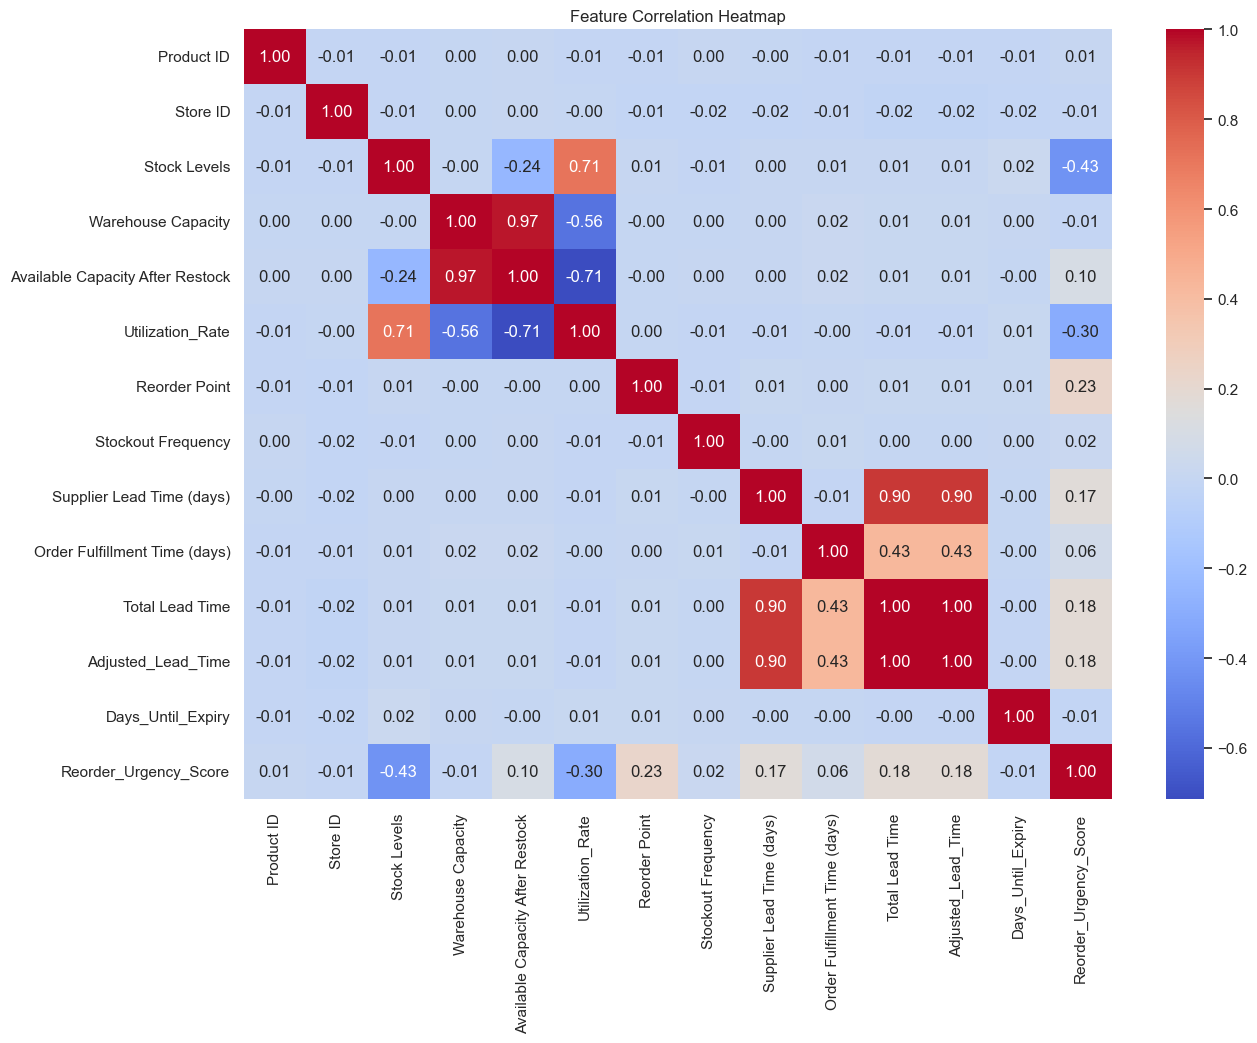

In [43]:
plt.figure(figsize=(14, 10))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()